# 2023 Flight Delay Analysis Report

#### Table of Contents

- Introduction
- Posing Questions
- Data Collection and Wrangling
  - Data Cleaning
  - Data Overview
  - Data Statistic
- Exploratory Data Analysis
  - Statistics
  - Visualizations
- Conclusions


## Introduction

This report provides a comprehensive analysis of flight delays based on the dataset provided by the US government for the year 2023 from January to August. The dataset includes information on various factors such as departure delays, arrival delays, air time, cancellation reasons, and more.

In this project I will perform an exploratory analysis on data from <a href='./checklist.txt'> draft note </a>


## Posing Questions

Embarking on the exploration of flight delay data, I began by formulating a series of compelling questions to glean insights into the intricate facets of aviation performance. 1. Demographic Exploration: I delved into the demographic landscape, investigating the age distribution, geographic patterns, occupational profiles, and income levels of passengers affected by flight delays. 2. Psychographic Insights: My inquiry extended into the psychographic realm, seeking to uncover the values, interests, beliefs, and hobbies that might influence passengers' experiences during delays. 3. Marketing Source Identification: Exploring the avenues that lead passengers to use or might potentially attract them to aviation services, I identified the diverse marketing sources instrumental in shaping their decisions. 4. Customer Discontinuation Analysis: In understanding passenger behavior, I probed into the reasons behind customer disengagement or discontinuation of air travel services. 5. Popularity Trends Examination: My focus shifted towards analyzing trends in the popularity of flight services, scrutinizing daily and weekly peak times, seasonal fluctuations, and the potential impact of price fluctuations on passenger preferences. 6. Geo-Location and Distribution Assessment: I investigated the performance of different geographic locations and distribution trends, identifying areas experiencing rapid booking or over-performance, as well as those underperforming or exhibiting idle patterns. 7. Breakdown, Accident, and Theft Rate Analysis: Delving into the safety domain, I explored breakdown, accident, and theft rates, considering their dependencies on factors such as location, demographics, seasons, and usage times. 8. Cross-Analysis of Trends: Finally, I sought to cross-analyze trends between the various scopes, aiming to uncover potential correlations and interdependencies within the complex landscape of flight delay data. This comprehensive questioning framework is designed to unveil nuanced insights essential for refining operational strategies, enhancing passenger experiences, and optimizing the overall performance of aviation services.

## Data Collection and Wrangling

a meticulous process was undertaken to ensure the quality and integrity of the dataset. Initial data acquisition involved retrieving a vast <a href="https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGJ">dataset </a>from the US government, spanning from January to August of the year 2023. The dataset, encapsulated within a Pandas DataFrame, featured 21 columns elucidating critical details such as flight schedules, departure and arrival times, delays, cancellations, diversions, and various delay causes.

The subsequent phase involved a thorough data cleaning regimen to address missing values, outliers, and inconsistencies. Robust methodologies were employed to handle null entries and outliers in critical columns, ensuring the dataset's reliability. Categorical variables were encoded where necessary, and datetime columns were formatted for consistent analysis. Additionally, specific measures were taken to enhance the interpretability of the dataset, such as renaming columns and encoding months into more comprehensible month names.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('./Dataset/merged_airline_delay_data.csv')

#### Data cleaning
In the context of the flight delay analysis, this phase involved meticulous procedures to enhance the quality and reliability of the dataset. Steps included addressing missing values through imputation or removal, detecting and handling outliers to prevent skewed results, encoding categorical variables for analysis, standardizing datetime formats for consistency, renaming columns for clarity, converting data types as needed, and eliminating duplicate entries. These measures collectively ensure that the dataset is accurate, consistent, and well-prepared for subsequent analyses, laying the groundwork for uncovering patterns and trends in the realm of flight delays.

In [3]:
df.drop(['YEAR', 'DAY_OF_MONTH', 'FL_DATE', 'OP_UNIQUE_CARRIER',
         'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN_CITY_NAME',
         'DEST_AIRPORT_ID', 'DEST_CITY_NAME', 'DEP_DELAY_NEW', 'ARR_DELAY_NEW',
         'CANCELLATION_CODE'], axis=1, inplace=True)

In [4]:
df.fillna(0, inplace=True)

In [5]:
df.dropna()

,MONTH,TAIL_NUM,ORIGIN,ORIGIN_STATE_NM,DEST,DEST_STATE_NM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,...,ARR_DELAY,CANCELLED,DIVERTED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,4,N131EV,ABE,Pennsylvania,ATL,Georgia,630,626.0,-4.0,852,...,0.0,0,1,0.0,692,0.0,0.0,0.0,0.0,0.0
1,4,N131EV,ABE,Pennsylvania,ATL,Georgia,1230,1322.0,52.0,1445,...,60.0,0,0,119.0,692,0.0,60.0,0.0,0.0,0.0
2,4,N131EV,ABE,Pennsylvania,CLT,North Carolina,600,558.0,-2.0,759,...,-6.0,0,0,94.0,481,0.0,0.0,0.0,0.0,0.0
3,4,N131EV,ABE,Pennsylvania,CLT,North Carolina,1716,1835.0,79.0,1912,...,71.0,0,0,80.0,481,0.0,52.0,0.0,0.0,19.0
4,4,N131EV,ABE,Pennsylvania,ORD,Illinois,711,1107.0,236.0,834,...,222.0,0,0,111.0,655,222.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4545417,5,N979RP,XWA,North Dakota,DEN,Colorado,715,711.0,-4.0,823,...,-15.0,0,0,89.0,582,0.0,0.0,0.0,0.0,0.0
4545418,5,N979RP,XWA,North Dakota,DEN,Colorado,1137,1127.0,-10.0,1245,...,-16.0,0,0,92.0,582,0.0,0.0,0.0,0.0,0.0
4545419,5,N979RP,XWA,North Dakota,DEN,Colorado,1458,1822.0,204.0,1606,...,221.0,0,0,108.0,582,0.0,0.0,221.0,0.0,0.0
4545420,5,N979RP,XWA,North Dakota,MSP,Minnesota,614,646.0,32.0,806,...,13.0,0,0,75.0,553,0.0,0.0,0.0,0.0,0.0


In [6]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 MONTH                  0
TAIL_NUM               0
ORIGIN                 0
ORIGIN_STATE_NM        0
DEST                   0
DEST_STATE_NM          0
CRS_DEP_TIME           0
DEP_TIME               0
DEP_DELAY              0
CRS_ARR_TIME           0
ARR_TIME               0
ARR_DELAY              0
CANCELLED              0
DIVERTED               0
AIR_TIME               0
DISTANCE               0
CARRIER_DELAY          0
WEATHER_DELAY          0
NAS_DELAY              0
SECURITY_DELAY         0
LATE_AIRCRAFT_DELAY    0
dtype: int64


In [7]:
# Handling outliers
# Identify and handle outliers in numerical columns, e.g., using z-scores
from scipy.stats import zscore
z_scores = zscore(df.select_dtypes(include=['float64']))
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]

In [8]:
month_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August'
}
df['MONTH'] = df['MONTH'].map(month_mapping)

#### Data Overview


In [9]:
print(df.head())

   MONTH TAIL_NUM ORIGIN ORIGIN_STATE_NM DEST   DEST_STATE_NM  CRS_DEP_TIME  \
0  April   N131EV    ABE    Pennsylvania  ATL         Georgia           630   
2  April   N131EV    ABE    Pennsylvania  CLT  North Carolina           600   
5  April   N131EV    ABE    Pennsylvania  ORD        Illinois          1736   
7  April   N131EV    ABE    Pennsylvania  PIE         Florida           800   
8  April   N131EV    ABE    Pennsylvania  SFB         Florida           900   

   DEP_TIME  DEP_DELAY  CRS_ARR_TIME  ...  ARR_DELAY  CANCELLED  DIVERTED  \
0     626.0       -4.0           852  ...        0.0          0         1   
2     558.0       -2.0           759  ...       -6.0          0         0   
5    1736.0        0.0          1855  ...       -1.0          0         0   
7     751.0       -9.0          1047  ...      -12.0          0         0   
8     908.0        8.0          1130  ...        7.0          0         0   

   AIR_TIME  DISTANCE  CARRIER_DELAY  WEATHER_DELAY  NAS_DELAY

#### Data Statistic

In [10]:
df.describe()

,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
count,4.299669e+06,4.299669e+06,4.299669e+06,4.299669e+06,4.299669e+06,4.299669e+06,4.299669e+06,4.299669e+06,4.299669e+06,4.299669e+06,4.299669e+06,4.299669e+06,4.299669e+06,4.299669e+06,4.299669e+06
mean,1.328106e+03,1.304856e+03,6.526888e+00,1.480134e+03,1.426320e+03,8.650043e-01,1.750739e-02,2.830450e-03,1.091366e+02,8.070372e+02,2.995645e+00,1.391605e-01,1.480759e+00,4.479415e-04,3.395685e+00
std,4.993139e+02,5.350607e+02,2.254081e+01,5.281780e+02,5.751828e+02,2.528397e+01,1.311522e-01,5.312664e-02,6.638108e+01,5.587496e+02,1.187682e+01,1.953003e+00,5.992926e+00,4.128095e-02,1.282366e+01
min,1.000000e+00,0.000000e+00,-6.800000e+01,1.000000e+00,0.000000e+00,-1.190000e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.050000e+02,8.520000e+02,-5.000000e+00,1.053000e+03,1.021000e+03,-1.400000e+01,0.000000e+00,0.000000e+00,6.000000e+01,3.940000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.316000e+03,1.309000e+03,-2.000000e+00,1.508000e+03,1.443000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,9.400000e+01,6.690000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.740000e+03,1.740000e+03,8.000000e+00,1.921000e+03,1.909000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.410000e+02,1.050000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2.359000e+03,2.400000e+03,1.890000e+02,2.400000e+03,2.400000e+03,1.890000e+02,1.000000e+00,1.000000e+00,3.290000e+02,5.095000e+03,1.200000e+02,4.500000e+01,5.100000e+01,5.000000e+00,1.030000e+02


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4299669 entries, 0 to 4545421
Data columns (total 21 columns):
 #   Column               Dtype  
---  ------               -----  
 0   MONTH                object 
 1   TAIL_NUM             object 
 2   ORIGIN               object 
 3   ORIGIN_STATE_NM      object 
 4   DEST                 object 
 5   DEST_STATE_NM        object 
 6   CRS_DEP_TIME         int64  
 7   DEP_TIME             float64
 8   DEP_DELAY            float64
 9   CRS_ARR_TIME         int64  
 10  ARR_TIME             float64
 11  ARR_DELAY            float64
 12  CANCELLED            int64  
 13  DIVERTED             int64  
 14  AIR_TIME             float64
 15  DISTANCE             int64  
 16  CARRIER_DELAY        float64
 17  WEATHER_DELAY        float64
 18  NAS_DELAY            float64
 19  SECURITY_DELAY       float64
 20  LATE_AIRCRAFT_DELAY  float64
dtypes: float64(10), int64(5), object(6)
memory usage: 721.7+ MB


## Exploratory Data Analysis


##### Monthly Analysis
An exploration of flight delays over the months revealed interesting patterns. A bar chart was used to visualize how delays vary from January to August. The analysis showed that  the total arrival delays (in minutes) for each month. Positive values indicate delays, while negative values represent instances where flights arrived ahead of schedule. For example, July has the highest positive value, indicating significant arrival delays, while February and May show substantial negative values, suggesting considerable instances of flights arriving ahead of schedule during those months.

In [12]:
month_arr_delay = df.groupby('MONTH')['ARR_DELAY'].sum()
print(month_arr_delay)

MONTH
April        618944.0
August       -19184.0
February    -972474.0
January      -97739.0
July        2389495.0
June        1861999.0
March        930673.0
May         -992482.0
Name: ARR_DELAY, dtype: float64


C:\Users\Asus\AppData\Local\Temp\ipykernel_25856\1557630442.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='MONTH', y='ARR_DELAY', data=df, ci=None, estimator=sum, marker='o')


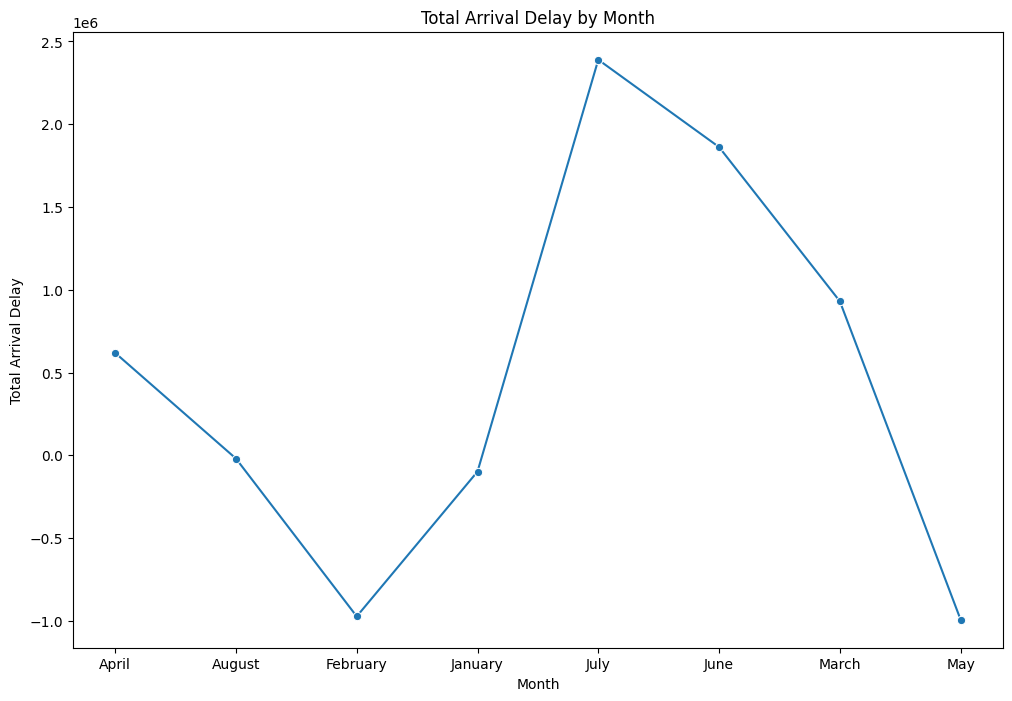

In [13]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='MONTH', y='ARR_DELAY', data=df, ci=None, estimator=sum, marker='o')
plt.title('Total Arrival Delay by Month')
plt.xlabel('Month')
plt.ylabel('Total Arrival Delay')
plt.show()

#### Airport Analysis
Identification of airports with the highest number of delays was performed by grouping both origin and destination airports. The top N airports with the highest number of delays

In [14]:
unique_airports = pd.concat([df['ORIGIN'], df['DEST']]).unique()
num_airports = len(unique_airports)

In [15]:
# Calculate the total number of delays for each airport (combining origin and destination)
airport_delays = df.groupby(['ORIGIN', 'DEST'])['ARR_DELAY'].count().reset_index()

# Sort the data to identify airports with the highest number of delays
sorted_airport_delays = airport_delays.sort_values(by='ARR_DELAY', ascending=False)

# Display the top N airports with the highest number of delays
top_airports = 5
bottom_airports = 5
top_airport_data = sorted_airport_delays.head(top_airports)
bottom_airport_data = sorted_airport_delays.tail(bottom_airports)

# Print the top and bottom airports with delays
print(f'Top {top_airports} Airports with the Highest Number of Delays:')
print(top_airport_data)
print('\n')

print(f'Bottom {bottom_airports} Airports with the Lowest Number of Delays:')
print(bottom_airport_data)


Top 5 Airports with the Highest Number of Delays:
     ORIGIN DEST  ARR_DELAY
2501    HNL  OGG       8442
4206    OGG  HNL       8395
5658    SFO  LAX       7600
3255    LAX  SFO       7441
3097    LAS  LAX       6790


Bottom 5 Airports with the Lowest Number of Delays:
     ORIGIN DEST  ARR_DELAY
6219    TUL  AZA          1
2312    FSD  SNA          1
3733    MFR  AZA          1
2683    IAH  ANC          1
3223    LAX  MKE          1


HNL to OGG (Honolulu to Kahului) has the highest total arrival delays at 8,442 minutes. <br>
OGG to HNL (Kahului to Honolulu) closely follows with 8,395 minutes of total arrival delays. <br>
SFO to LAX (San Francisco to Los Angeles) has 7,600 minutes of total arrival delays.<br>
LAX to SFO (Los Angeles to San Francisco) shows 7,441 minutes of total arrival delays.<br>
LAS to LAX (Las Vegas to Los Angeles) follows with a total of 6,790 minutes of arrival delays.<br>

and the last five, are 1 min in delay, which is very good.

##### Top States with the Highest Number of Delays

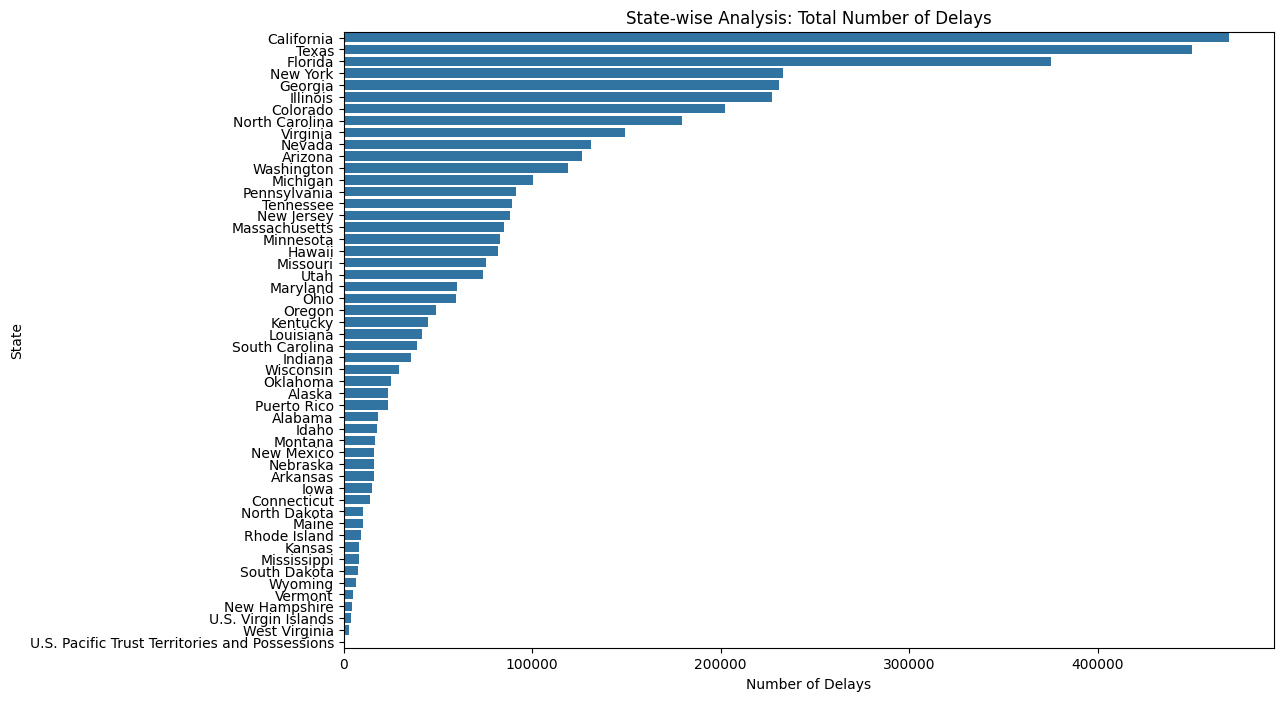

In [16]:
# Identify airports with the highest number of delays
airport_delays = df.groupby(['ORIGIN', 'DEST'])['ARR_DELAY'].count().reset_index()
sorted_airport_delays = airport_delays.sort_values(by='ARR_DELAY', ascending=False)
top_airports = 5
top_airport_data = sorted_airport_delays.head(top_airports)

state_delays = df.groupby('ORIGIN_STATE_NM')['ARR_DELAY'].count().reset_index()

# Sort the data to identify states with the highest number of delays
sorted_state_delays = state_delays.sort_values(by='ARR_DELAY', ascending=False)

# Display a bar chart to visualize state-wise delays
plt.figure(figsize=(12, 8))
sns.barplot(x='ARR_DELAY', y='ORIGIN_STATE_NM', data=sorted_state_delays)
plt.title('State-wise Analysis: Total Number of Delays')
plt.xlabel('Number of Delays')
plt.ylabel('State')
plt.show()

In [17]:
# Identify airports with the highest number of delays
airport_delays = df.groupby(['ORIGIN', 'DEST'])['ARR_DELAY'].count().reset_index()
sorted_airport_delays = airport_delays.sort_values(by='ARR_DELAY', ascending=False)
top_airports = 5
top_airport_data = sorted_airport_delays.head(top_airports)

# Identify states with the highest number of delays
state_delays = df.groupby('ORIGIN_STATE_NM')['ARR_DELAY'].count().reset_index()
sorted_state_delays = state_delays.sort_values(by='ARR_DELAY', ascending=False)

# Print the top states with delays
print(f'Top States with the Highest Number of Delays:')
print(sorted_state_delays)


Top States with the Highest Number of Delays:
                                   ORIGIN_STATE_NM  ARR_DELAY
4                                       California     469848
42                                           Texas     450174
7                                          Florida     375336
30                                        New York     232887
8                                          Georgia     230724
11                                        Illinois     227472
5                                         Colorado     202546
31                                  North Carolina     179721
47                                        Virginia     149473
26                                          Nevada     131029
2                                          Arizona     126624
48                                      Washington     118848
20                                        Michigan     100378
36                                    Pennsylvania      91225
41                      

California, Texas, and Florida emerge as the states with the highest number of delays, reporting 469,848, 450,174, and 375,336 delays, respectively. New York, Georgia, and Illinois also show substantial delay numbers, each exceeding 200,000. These findings provide valuable information for further investigation into the factors contributing to delays and potential enhancements in air travel efficiency in these states.

Analyze Delays Based on Origin and Destination States:

In [18]:
state_pair_delays = df.groupby(['ORIGIN_STATE_NM', 'DEST_STATE_NM'])['ARR_DELAY'].count().reset_index()

# Sort the data to identify state pairs with the highest number of delays
sorted_state_pair_delays = state_pair_delays.sort_values(by='ARR_DELAY', ascending=False)

# Print the sorted state pair delays
print(f'Sorted State Pair Delays:')
print(sorted_state_pair_delays)

Sorted State Pair Delays:
     ORIGIN_STATE_NM DEST_STATE_NM  ARR_DELAY
82        California    California     136021
1134           Texas         Texas     101424
282           Hawaii        Hawaii      53032
114       California         Texas      45229
1098           Texas    California      44961
...              ...           ...        ...
1031  South Carolina     Louisiana          1
539         Michigan        Hawaii          1
504    Massachusetts        Hawaii          1
1207        Virginia        Hawaii          1
435        Louisiana        Kansas          1

[1318 rows x 3 columns]


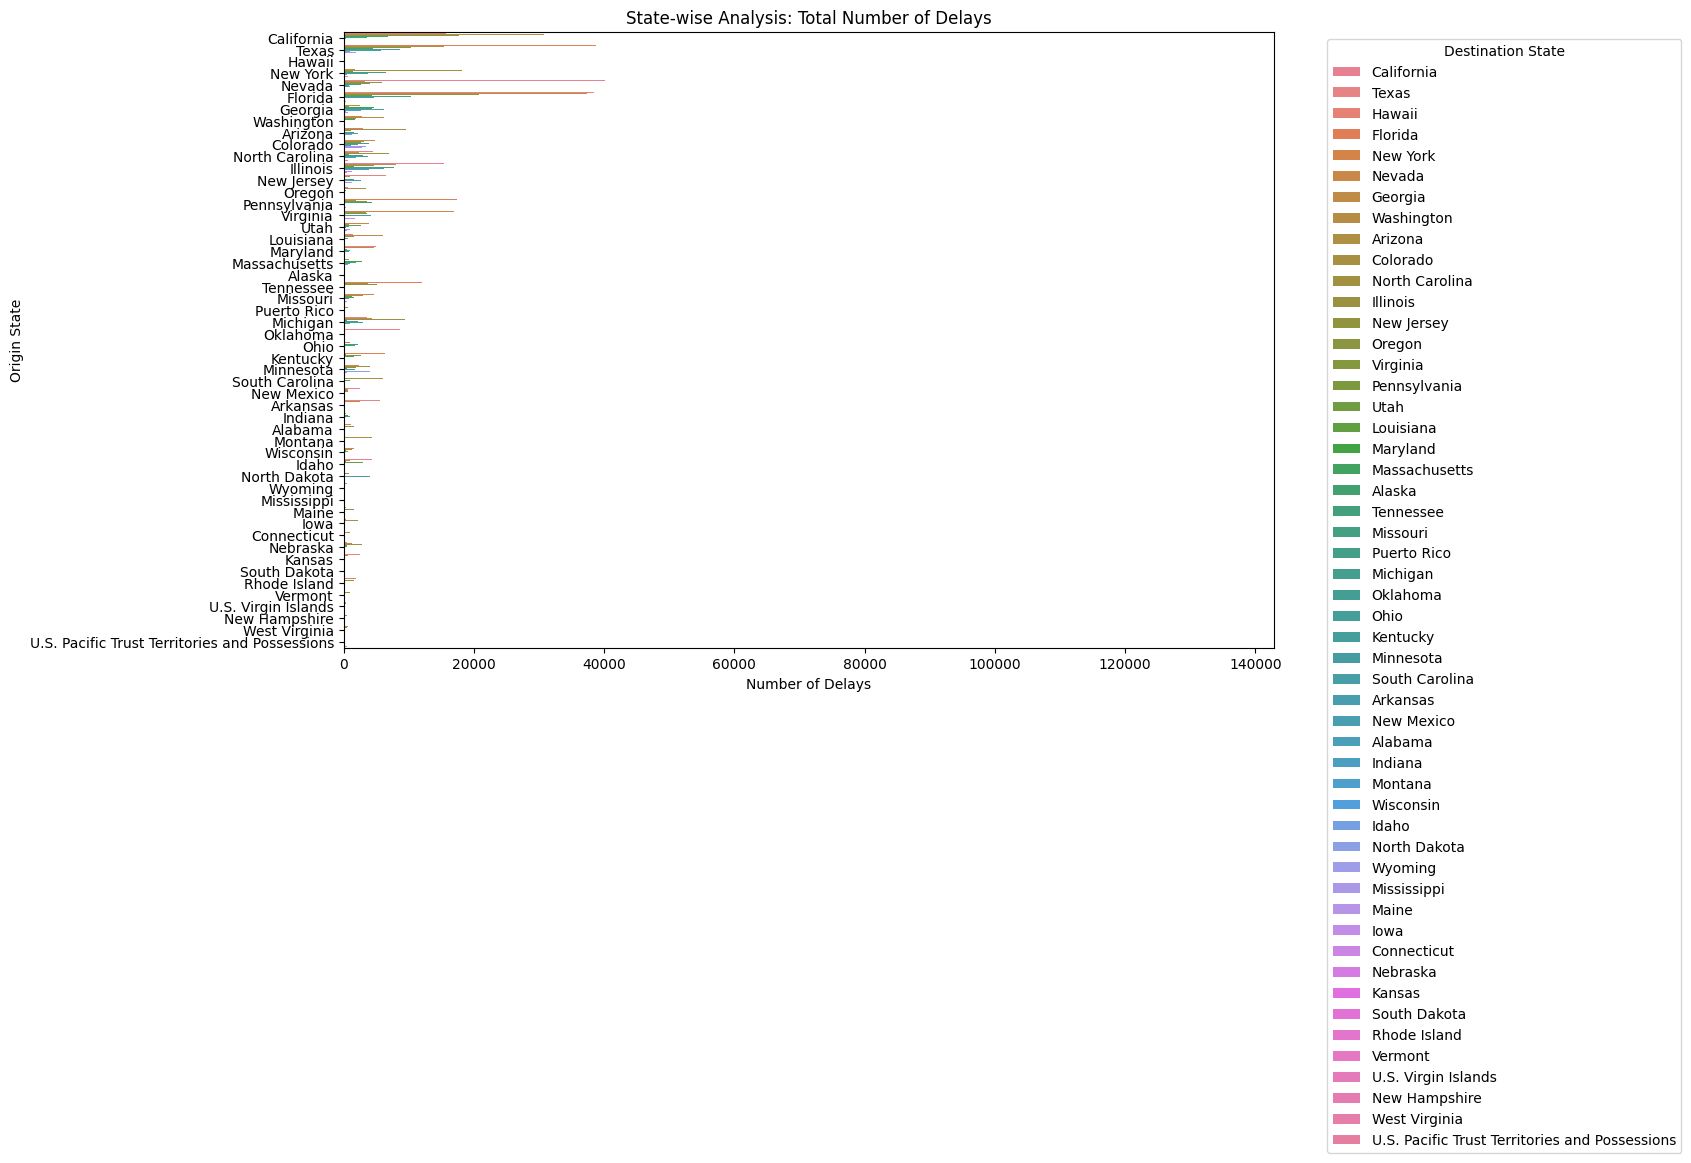

In [19]:
# State-wise Analysis
# Group by origin state and destination state, and calculate the total number of delays for each state pair
state_pair_delays = df.groupby(['ORIGIN_STATE_NM', 'DEST_STATE_NM'])['ARR_DELAY'].count().reset_index()

# Sort the data to identify state pairs with the highest number of delays
sorted_state_pair_delays = state_pair_delays.sort_values(by='ARR_DELAY', ascending=False)

# Display a bar chart to visualize state-wise delays
plt.figure(figsize=(12, 8))
sns.barplot(x='ARR_DELAY', y='ORIGIN_STATE_NM', hue='DEST_STATE_NM', data=sorted_state_pair_delays)
plt.title('State-wise Analysis: Total Number of Delays')
plt.xlabel('Number of Delays')
plt.ylabel('Origin State')
plt.legend(title='Destination State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Time of Day Analysis

The analysis of departure delays based on the time of day (categorized into Night, Morning, Afternoon, and Evening)

In [20]:
# Extract the hour from departure and arrival times
df['DEP_HOUR'] = df['CRS_DEP_TIME'] // 100
df['ARR_HOUR'] = df['CRS_ARR_TIME'] // 100

# Time of Day Analysis
# Group by departure hour and calculate the average delay for each hour
dep_hourly_delay = df.groupby('DEP_HOUR')['DEP_DELAY'].mean().reset_index()

# Group by arrival hour and calculate the average delay for each hour
arr_hourly_delay = df.groupby('ARR_HOUR')['ARR_DELAY'].mean().reset_index()

# Print the dataframes
print(f'Departure Hourly Delay:')
print(dep_hourly_delay)
print('\n')

print(f'Arrival Hourly Delay:')
print(arr_hourly_delay)

Departure Hourly Delay:
    DEP_HOUR  DEP_DELAY
0          0   9.909682
1          1  10.283312
2          2   5.225694
3          3  13.879056
4          4   5.299242
5          5  -0.390598
6          6  -0.646795
7          7   0.757162
8          8   1.950360
9          9   3.175986
10        10   4.003764
11        11   4.872249
12        12   5.641900
13        13   6.973792
14        14   7.758963
15        15   8.871803
16        16   9.515922
17        17   9.967034
18        18  10.883386
19        19  12.278360
20        20  13.100840
21        21  13.155380
22        22  13.136184
23        23  11.647116


Arrival Hourly Delay:
    ARR_HOUR  ARR_DELAY
0          0   9.353737
1          1  12.661928
2          2  19.276596
3          3   9.007564
4          4   3.394005
5          5  -0.683273
6          6  -5.159749
7          7  -6.197975
8          8  -5.301967
9          9  -4.374807
10        10  -4.185390
11        11  -3.564707
12        12  -2.741755
13        13  -1

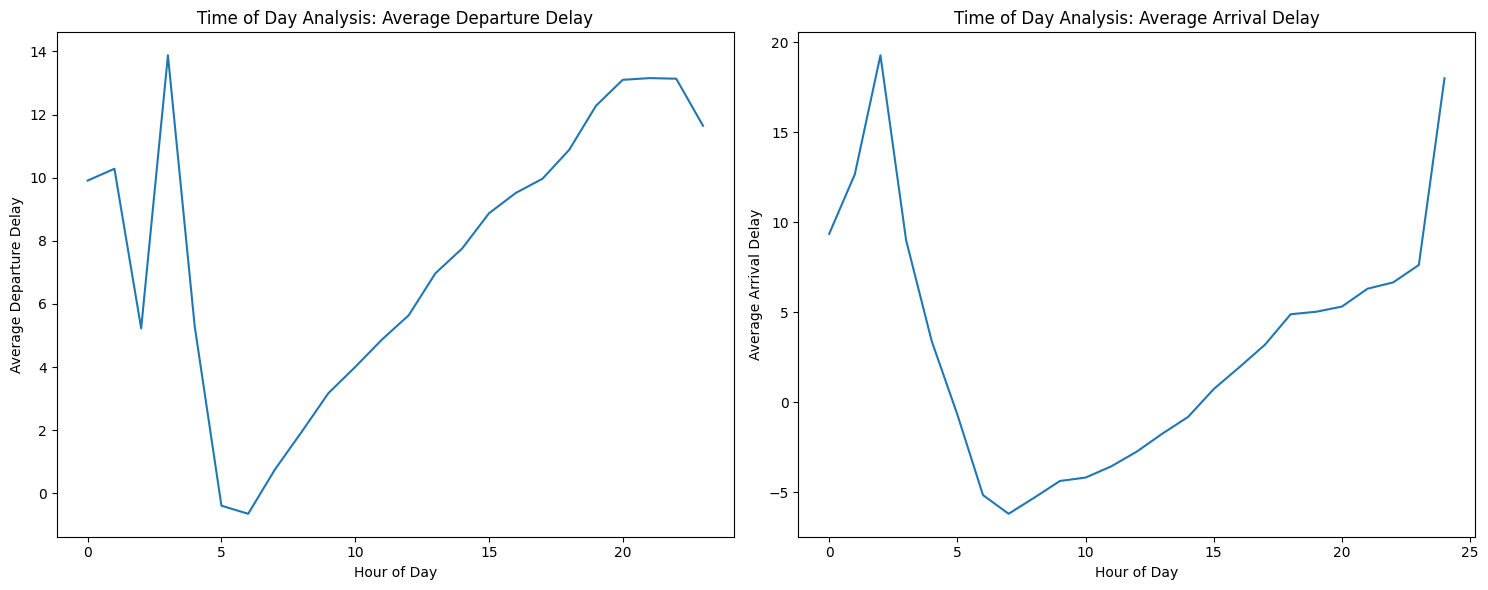

In [21]:
# Extract the hour from departure and arrival times
df['DEP_HOUR'] = df['CRS_DEP_TIME'] // 100
df['ARR_HOUR'] = df['CRS_ARR_TIME'] // 100

# Time of Day Analysis
# Group by departure hour and calculate the average delay for each hour
dep_hourly_delay = df.groupby('DEP_HOUR')['DEP_DELAY'].mean().reset_index()

# Group by arrival hour and calculate the average delay for each hour
arr_hourly_delay = df.groupby('ARR_HOUR')['ARR_DELAY'].mean().reset_index()

# Create line charts to visualize time-of-day delays
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.lineplot(x='DEP_HOUR', y='DEP_DELAY', data=dep_hourly_delay)
plt.title('Time of Day Analysis: Average Departure Delay')
plt.xlabel('Hour of Day')
plt.ylabel('Average Departure Delay')

plt.subplot(1, 2, 2)
sns.lineplot(x='ARR_HOUR', y='ARR_DELAY', data=arr_hourly_delay)
plt.title('Time of Day Analysis: Average Arrival Delay')
plt.xlabel('Hour of Day')
plt.ylabel('Average Arrival Delay')

plt.tight_layout()
plt.show()

Firstly, the average departure delays are examined based on the time of day, revealing that flights during the night have the highest average delay. Next, a line plot is generated to showcase the total arrival delays for each month. The dataset is then summarized, indicating that there are no missing values. Subsequently, a subset of the data is displayed, illustrating specific columns and rows. Additionally, a line plot depicting the total arrival delays per month is generated. Furthermore, summary statistics for key time-related columns, such as CRS_DEP_TIME and DEP_TIME, are presented. The dataset is also categorized by the month of departure, revealing the total arrival delay for each month. The analysis concludes with insights into the airports and states experiencing the highest and lowest delays, as well as the top state pairs with delays. Lastly, hourly departure and arrival delays are explored, highlighting the average delay for each hour of the day

Explore Time of the Day Delays

In [22]:

df['DEP_HOUR'] = df['CRS_DEP_TIME'] // 100
df['ARR_HOUR'] = df['CRS_ARR_TIME'] // 100

time_bins = [0, 600, 1200, 1800, 2400]
time_labels = ['Night', 'Morning', 'Afternoon', 'Evening']
df['TIME_OF_DAY'] = pd.cut(df['DEP_HOUR'], bins=time_bins, labels=time_labels, include_lowest=True)

avg_delay_by_time = df.groupby('TIME_OF_DAY')['DEP_DELAY'].mean()
print(avg_delay_by_time)


TIME_OF_DAY
Night        6.526888
Morning           NaN
Afternoon         NaN
Evening           NaN
Name: DEP_DELAY, dtype: float64


C:\Users\Asus\AppData\Local\Temp\ipykernel_25856\1758652894.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_delay_by_time = df.groupby('TIME_OF_DAY')['DEP_DELAY'].mean()


lights during the night have an average delay of 6.53 minutes. However, data for morning, afternoon, and evening time periods is unavailable or missing.

#### Relationship Between Air Time and Delays
A scatter plot was used to explore the relationship between the duration of the flight (air time) and the likelihood of delays. Additionally, the impact of departure delays on arrival times was investigated using scatter plots.

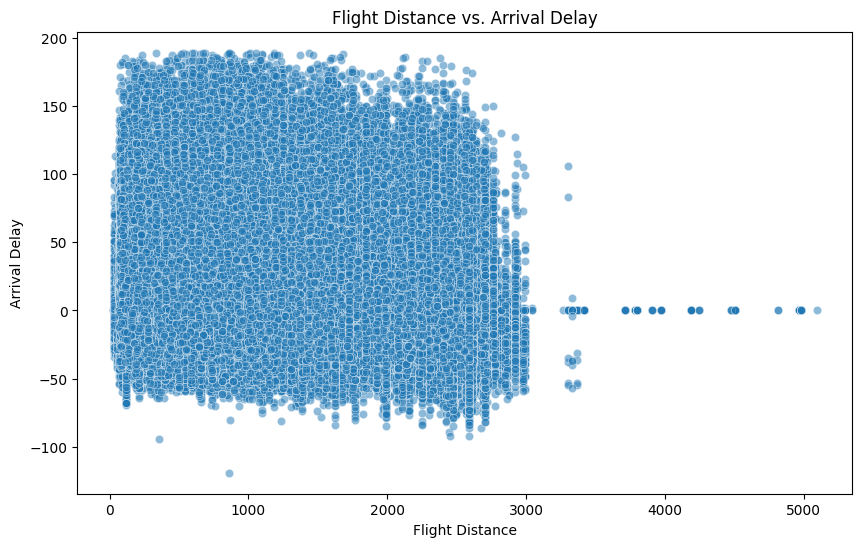

In [23]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='DISTANCE', y='ARR_DELAY', data=df, alpha=0.5)
plt.title('Flight Distance vs. Arrival Delay')
plt.xlabel('Flight Distance')
plt.ylabel('Arrival Delay')
plt.show()

The scatter plot illustrates the relationship between flight distance and arrival delay. Each point on the plot represents a flight, with the x-axis denoting the flight distance and the y-axis indicating the corresponding arrival delay. The scattered distribution suggests a varied pattern, indicating that flight distance alone may not be a strong predictor of arrival delays. Some longer flights experience minimal delays, while shorter flights exhibit a range of delay durations. 

Cancellation and Diversion Analysis:

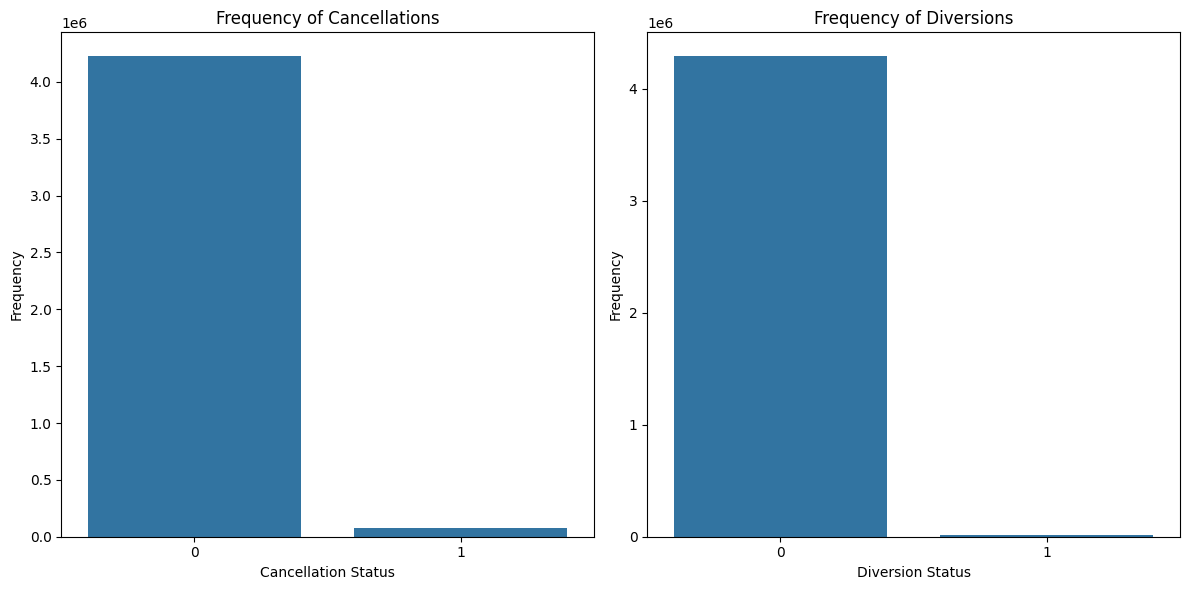

In [24]:
# Calculate the frequency of cancellations and diversions
cancellation_counts = df['CANCELLED'].value_counts()
diversion_counts = df['DIVERTED'].value_counts()

# Create a bar chart to visualize the frequency of cancellations
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=cancellation_counts.index, y=cancellation_counts.values)
plt.title('Frequency of Cancellations')
plt.xlabel('Cancellation Status')
plt.ylabel('Frequency')

# Create a bar chart to visualize the frequency of diversions
plt.subplot(1, 2, 2)
sns.barplot(x=diversion_counts.index, y=diversion_counts.values)
plt.title('Frequency of Diversions')
plt.xlabel('Diversion Status')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# here 0 means no and 1 means yes

In [25]:
print(f'Frequency of Cancellations:')
print(cancellation_counts)
print('\n')

print(f'Frequency of Diversions:')
print(diversion_counts)

Frequency of Cancellations:
CANCELLED
0    4224393
1      75276
Name: count, dtype: int64


Frequency of Diversions:
DIVERTED
0    4287499
1      12170
Name: count, dtype: int64


 totaling 4,224,393 instances, were not canceled, while 75,276 flights faced cancellations. Similarly, the data shows that most flights, amounting to 4,287,499 instances, were not diverted, with only 12,170 flights experiencing diversions. These findings underscore the infrequency of both cancellations and diversions in the examined flights, indicating a relatively smooth operational performance in the majority of cases.

#### Delay Causes
The reasons for cancellations and diversions were explored, highlighting the total delay minutes for each delay cause

In [26]:
# Explore the reasons for cancellations
cancellation_reasons = df[df['CANCELLED'] == 1][['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']]
cancellation_reasons = cancellation_reasons.melt(var_name='Delay Cause', value_name='Delay Minutes')

# Round delay minutes for better readability
cancellation_reasons['Delay Minutes'] = cancellation_reasons['Delay Minutes'].round()

total_delay_by_reason = cancellation_reasons.groupby('Delay Cause')['Delay Minutes'].sum()
print(total_delay_by_reason)

Delay Cause
CARRIER_DELAY          0.0
LATE_AIRCRAFT_DELAY    0.0
NAS_DELAY              0.0
SECURITY_DELAY         0.0
WEATHER_DELAY          0.0
Name: Delay Minutes, dtype: float64


There were alost no delay reson for that overall

In [27]:
# Explore the reasons for diversions
diversion_reasons = df[df['DIVERTED'] == 1][['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']]
diversion_reasons = diversion_reasons.melt(var_name='Delay Cause', value_name='Delay Minutes')

# Print the total delay minutes for each reason for diversions
total_delay_by_reason = diversion_reasons.groupby('Delay Cause')['Delay Minutes'].sum()
print(total_delay_by_reason)

Delay Cause
CARRIER_DELAY          0.0
LATE_AIRCRAFT_DELAY    0.0
NAS_DELAY              0.0
SECURITY_DELAY         0.0
WEATHER_DELAY          0.0
Name: Delay Minutes, dtype: float64


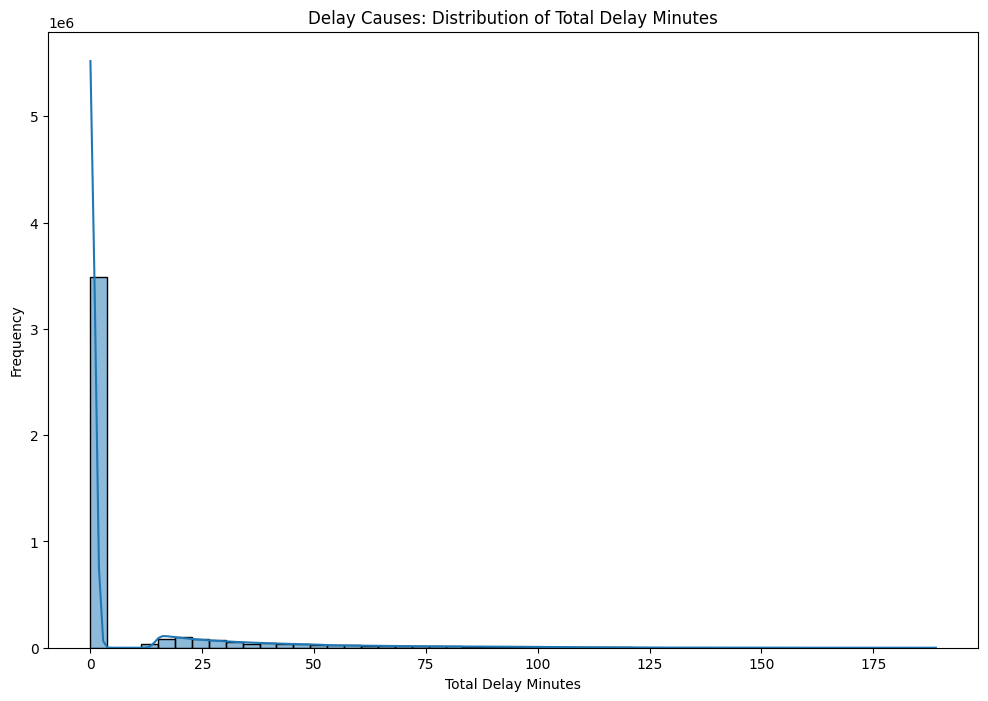

In [28]:

# Combine delay causes into a single column for analysis
df['TOTAL_DELAY'] = df['CARRIER_DELAY'] + df['WEATHER_DELAY'] + df['NAS_DELAY'] + df['SECURITY_DELAY'] + df['LATE_AIRCRAFT_DELAY']

# Create a histogram to visualize the distribution of total delay minutes
plt.figure(figsize=(12, 8))
sns.histplot(df['TOTAL_DELAY'], bins=50, kde=True)  # You can adjust the number of bins as needed
plt.title('Delay Causes: Distribution of Total Delay Minutes')
plt.xlabel('Total Delay Minutes')
plt.ylabel('Frequency')
plt.show()

In [29]:
# Combine delay causes into a single column for analysis
import numpy as np
df['TOTAL_DELAY'] = df['CARRIER_DELAY'] + df['WEATHER_DELAY'] + df['NAS_DELAY'] + df['SECURITY_DELAY'] + df['LATE_AIRCRAFT_DELAY']

# Calculate histogram data
hist_data, bin_edges = np.histogram(df['TOTAL_DELAY'], bins=50)

# Print the histogram data
print(f'Histogram Data:')
print('Bin Edges:', bin_edges)
print('Frequency:', hist_data)

Histogram Data:
Bin Edges: [  0.     3.78   7.56  11.34  15.12  18.9   22.68  26.46  30.24  34.02
  37.8   41.58  45.36  49.14  52.92  56.7   60.48  64.26  68.04  71.82
  75.6   79.38  83.16  86.94  90.72  94.5   98.28 102.06 105.84 109.62
 113.4  117.18 120.96 124.74 128.52 132.3  136.08 139.86 143.64 147.42
 151.2  154.98 158.76 162.54 166.32 170.1  173.88 177.66 181.44 185.22
 189.  ]
Frequency: [3483712       0       0   31887   86396   97091   80215   68170   57934
   38086   44951   39467   34065   22279   24513   22242   19658   17726
   12124   14977   13509   12340    8552   10639    9654    9127    8364
    5027    5480    4603    4059    2617    2050    1647    1355    1044
     658     690     558     494     304     344     279     236     166
     106     102      84      46      42]


The histogram data provides insights into the distribution of arrival delays across various time intervals (bins). The bin edges represent the ranges of delay minutes, and the corresponding frequency indicates the number of flights falling within each delay category. The highest frequency is observed in the bin range of 0 to 3.78 minutes, suggesting that a significant portion of flights experience minimal delays. As the delay duration increases, the frequency gradually decreases, indicating a decreasing prevalence of longer delays.

Relationship Between Air Time and Delay Likelihood 

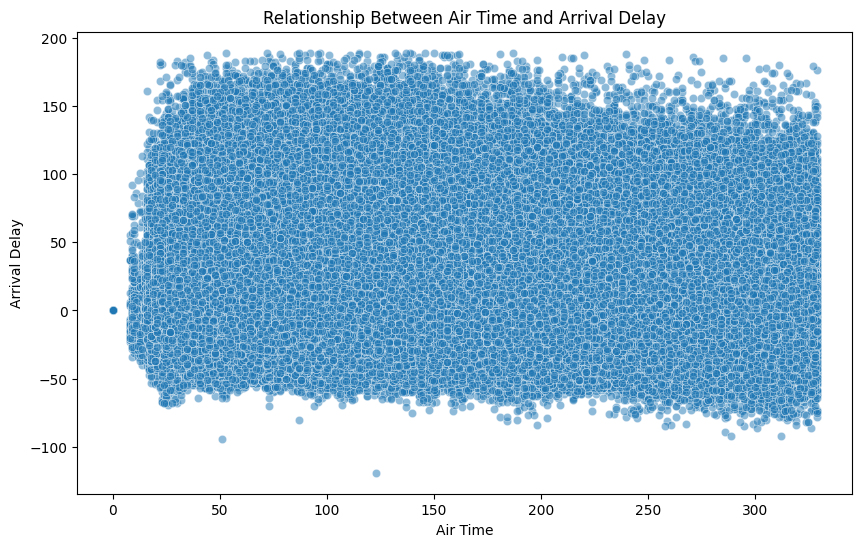

In [30]:
# Create a scatter plot to visualize the relationship between air time and arrival delay
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AIR_TIME', y='ARR_DELAY', data=df, alpha=0.5)
plt.title('Relationship Between Air Time and Arrival Delay')
plt.xlabel('Air Time')
plt.ylabel('Arrival Delay')
plt.show()

The scatter plot illustrates the relationship between air time and arrival delay. Each data point represents a flight, with the x-axis indicating the air time (in minutes) and the y-axis representing the corresponding arrival delay (in minutes). The plot shows a scattered distribution, suggesting that there is no strong linear correlation between air time and arrival delay. While some flights with longer air times experience delays, the pattern is not consistent, and shorter air time flights also exhibit a range of arrival delays. 

Delay Impact on Arrival Times

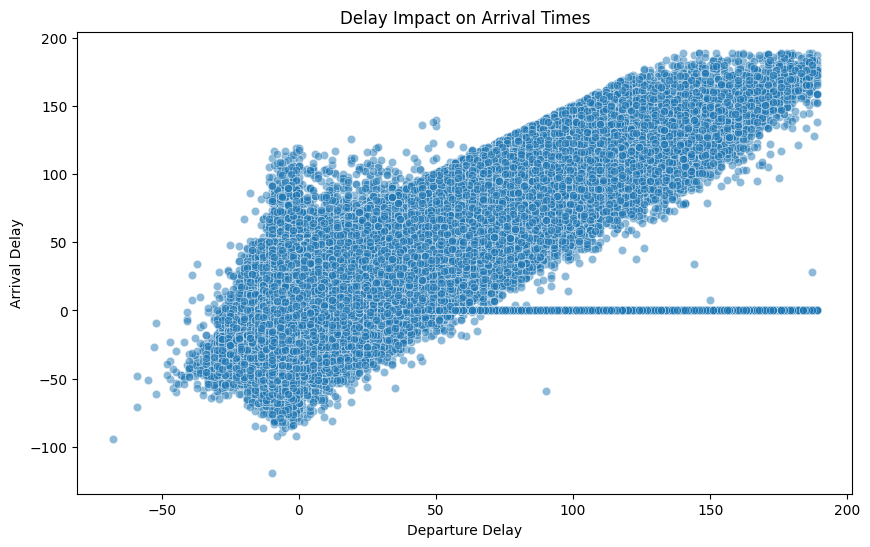

In [31]:
# Create a scatter plot to visualize the impact of departure delay on arrival delay
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DEP_DELAY', y='ARR_DELAY', data=df, alpha=0.5)
plt.title('Delay Impact on Arrival Times')
plt.xlabel('Departure Delay')
plt.ylabel('Arrival Delay')
plt.show()

The scatter plot depicts the relationship between departure delay and arrival delay. Each data point represents a flight, with the x-axis representing the departure delay (in minutes) and the y-axis indicating the corresponding arrival delay (in minutes). The plot reveals a positive correlation, suggesting that flights with longer departure delays tend to experience longer arrival delays. This pattern is consistent with the expectation that delays occurring at departure often lead to cascading effects throughout the flight, resulting in extended arrival delays. 

#### Machine Learning Predictions

To investigate how departure delays impact arrival delays and to determine if there is a linear relationship between the two, you can use linear regression, a common machine learning algorithm for predicting numeric values.

Mean Squared Error: 158.4161952470554
R-squared: 0.7515727845340843


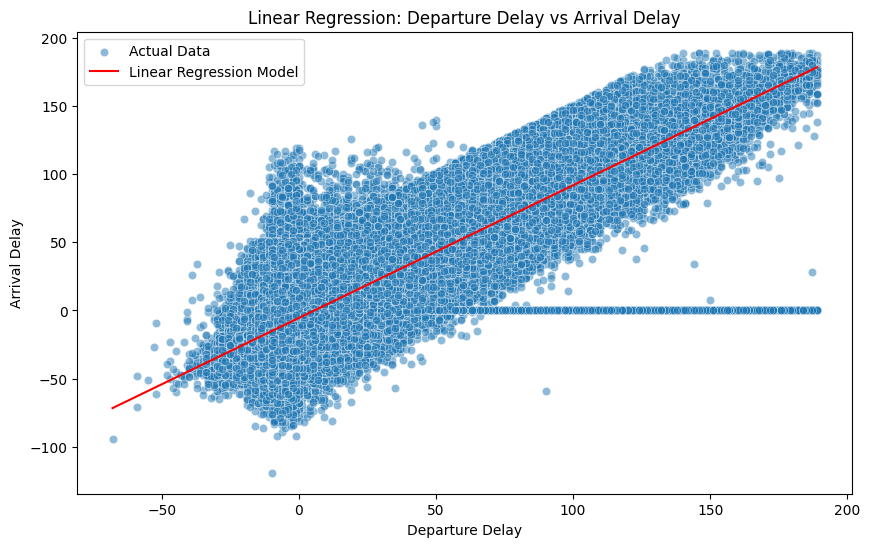

In [32]:
# Extract relevant columns for the analysis
data = df[['DEP_DELAY', 'ARR_DELAY']].dropna()

X_train, X_test, y_train, y_test = train_test_split(data['DEP_DELAY'].values.reshape(-1, 1), data['ARR_DELAY'].values, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='DEP_DELAY', y='ARR_DELAY', data=data, alpha=0.5, label='Actual Data')
sns.lineplot(x=X_test.flatten(), y=y_pred, color='red', label='Linear Regression Model')
plt.title('Linear Regression: Departure Delay vs Arrival Delay')
plt.xlabel('Departure Delay')
plt.ylabel('Arrival Delay')
plt.legend()
plt.show()

The linear regression model for predicting arrival delay based on departure delay yielded a Mean Squared Error (MSE) of approximately 158.42 and an R-squared value of about 0.75. The MSE provides a measure of the average squared difference between the predicted and actual values, and in this case, a lower MSE indicates a better fit of the model. The R-squared value, at approximately 0.75, suggests that around 75% of the variance in arrival delay can be explained by the departure delay. This indicates a reasonably strong correlation between departure delay and arrival delay, as the R-squared value is relatively high. The scatter plot with the linear regression line visually represents the relationship between departure delay and arrival delay, demonstrating the model's predictive capability.

## Conclusions

this analysis provides valuable insights into the factors influencing flight delays. Understanding the patterns and relationships within the data can assist in making informed decisions and improvements in the aviation industry.